In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

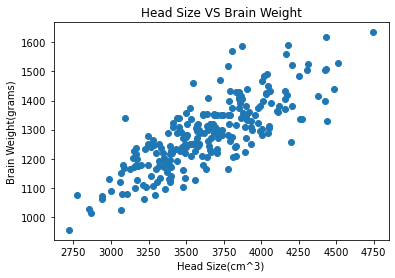

In [2]:
#Loading the data set
data=pd.read_csv('../BrainSize/homo_sapiens/headbrain.csv')
data.head()

# Visualize data
head = "Head Size(cm^3)"
brain = "Brain Weight(grams)"
plt.scatter(data[head], data[brain])
plt.xlabel(head)
plt.ylabel(brain)
plt.title("Head Size VS Brain Weight")
plt.show()

In [3]:
# Train / test splitting dataset
train, test = train_test_split(data,  test_size = 0.2)

# Converting training data into tensors for Pytorch
X_train = torch.Tensor([[x] for x in list(train[head])])
y_train = torch.torch.FloatTensor([[x] for x in list(train[brain])])

# Converting test data into tensors for Pytorch
X_test = torch.Tensor([[x] for x in list(test[head])])
y_test = torch.torch.FloatTensor([[x] for x in list(test[brain])])

def norm(x):
    return (x - x.mean()) / x.std()

X_train, X_test = norm(X_train), norm(X_test)

In [4]:
#Data set & Data set Loader
from torch.utils.data import TensorDataset
train_data=TensorDataset(X_train, y_train)
train_data[0:5]

# Define data loader
from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(train_data, batch_size, shuffle=True)

In [5]:
# Define model
model = nn.Linear(1, 1) # nn.Linear(in_features,out_features)
print(model.weight)
print(model.bias)

# printing the model Parameters
print(list(model.parameters()))

#Define the loss function
loss_fun = nn.MSELoss()

# Define SGD optimizer with learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Parameter containing:
tensor([[0.7190]], requires_grad=True)
Parameter containing:
tensor([-0.3920], requires_grad=True)
[Parameter containing:
tensor([[0.7190]], requires_grad=True), Parameter containing:
tensor([-0.3920], requires_grad=True)]


In [6]:
# Utility function to train the model
def lrmodel(num_epochs, model, loss_fun, optimizer, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb, yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
#             import pdb; pdb.set_trace();
            # 2. Calculate loss
            loss = loss_fun(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            optimizer.step()
            
            # 5. Reset the gradients to zero
            optimizer.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

            
#Training for 100 epochs
num_epochs=100
lrmodel(num_epochs, model, loss_fun, optimizer, train_dl)

# Generate predictions
preds = model(X_train)

Epoch [10/100], Loss: 365299.1562
Epoch [20/100], Loss: 75116.6250
Epoch [30/100], Loss: 26274.6133
Epoch [40/100], Loss: 27798.0527
Epoch [50/100], Loss: 3712.5127
Epoch [60/100], Loss: 4557.6992
Epoch [70/100], Loss: 749.3049
Epoch [80/100], Loss: 1301.3364
Epoch [90/100], Loss: 6720.3013
Epoch [100/100], Loss: 5854.5732


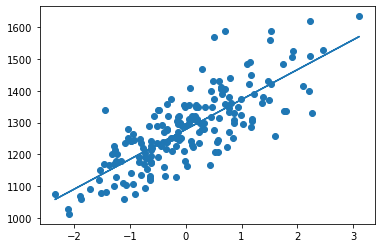

In [27]:
plt.scatter(X_train.numpy(), y_train.numpy())
plt.plot(X_train.numpy(), preds.detach().numpy())
plt.show()
plt.close()

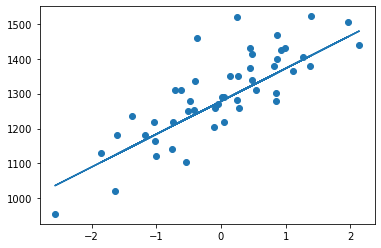

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model(X_test).detach())
plt.show()
plt.close()